In [1]:
%config IPCompleter.use_jedi = False
%pdb off
%load_ext autoreload
%autoreload 3
import sys
from copy import deepcopy
from typing import List, Dict, Tuple, Optional, Union, Callable
import pandas as pd
import re
from pathlib import Path
from datetime import datetime
import plotly.express as px
# Plotting
# import pylustrator # customization of figures
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
_bak_rcParams = mpl.rcParams.copy()

# matplotlib.use('Qt5Agg')
%matplotlib inline
# %matplotlib auto

# _restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')
# _restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')
import seaborn as sns


Automatic pdb calling has been turned OFF


# Definitions

In [2]:
def find_csv_files(directory: str):
    directory_path = Path(directory) # Convert string path to a Path object
    return list(directory_path.glob('**/*.csv')) # Return a list of all .csv files in the directory and its subdirectories
    

def find_HDF5_files(directory: str):
    directory_path = Path(directory) # Convert string path to a Path object
    return list(directory_path.glob('**/*.h5')) # Return a list of all .h5 files in the directory and its subdirectories


# 2024-01-23 - 
# C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-23_GL-fet11-01_12-58-54_time_bin_size_sweep_results.h5
# C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-23_GL-11-03_12-3-25_time_bin_size_sweep_results.h5
# C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-23_GL-11-02_17-46-44_time_bin_size_sweep_results.h5
# C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-23_GL-11-02_19-28-0_time_bin_size_sweep_results.h5
# C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-23_GL-2006-4-10_12-58-3_time_bin_size_sweep_results.h5
# C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-23_GL-2006-4-10_12-25-50_time_bin_size_sweep_results.h5
# C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-23_GL-2006-4-09_16-40-54_time_bin_size_sweep_results.h5
# C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-23_GL-2006-6-09_22-24-40_time_bin_size_sweep_results.h5
# C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-23_GL-2006-6-12_16-53-46_time_bin_size_sweep_results.h5
# C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-23_GL-2006-4-09_17-29-30_time_bin_size_sweep_results.h5
# C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-23_GL-2006-6-08_14-26-15_time_bin_size_sweep_results.h5
# C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-23_GL-2006-6-09_1-22-43_time_bin_size_sweep_results.h5
# C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-23_GL-2006-6-07_16-40-19_time_bin_size_sweep_results.h5
# C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-23_GL-2006-6-08_21-16-25_time_bin_size_sweep_results.h5
# C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-23_GL-2006-6-12_15-55-31_time_bin_size_sweep_results.h5



# found_session_export_paths = [Path(v).resolve() for v in  ["C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-12_0420PM-kdiba_pin01_one_fet11-01_12-58-54-(laps_marginals_df).csv",
# "C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-12_0420PM-kdiba_pin01_one_fet11-01_12-58-54-(ripple_marginals_df).csv",
# "C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-12_0645PM-kdiba_pin01_one_fet11-01_12-58-54-(laps_marginals_df).csv",
# "C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-12_0645PM-kdiba_pin01_one_fet11-01_12-58-54-(ripple_marginals_df).csv",
# "C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-12_0828PM-kdiba_pin01_one_fet11-01_12-58-54-(laps_marginals_df).csv",
# "C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-12_0828PM-kdiba_pin01_one_fet11-01_12-58-54-(ripple_marginals_df).csv",
# ]]

def parse_filename(path: Path, debug_print:bool=False) -> Tuple[datetime, str, str]:
    """ 
    # from the found_session_export_paths, get the most recently exported laps_csv, ripple_csv (by comparing `export_datetime`) for each session (`session_str`)
    a_export_filename: str = "2024-01-12_0420PM-kdiba_pin01_one_fet11-01_12-58-54-(laps_marginals_df).csv"
    export_datetime = "2024-01-12_0420PM"
    session_str = "kdiba_pin01_one_fet11-01_12-58-54"
    export_file_type = "(laps_marginals_df)" # .csv

    # return laps_csv, ripple_csv
    laps_csv = Path("C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-12_0828PM-kdiba_pin01_one_fet11-01_12-58-54-(laps_marginals_df).csv").resolve()
    ripple_csv = Path("C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-12_0828PM-kdiba_pin01_one_fet11-01_12-58-54-(ripple_marginals_df).csv").resolve()

    """
    filename = path.stem   # Get filename without extension
    
    pattern = r"(?P<export_datetime_str>.*_\d{2}\d{2}[APMF]{2})-(?P<session_str>.*)-(?P<export_file_type>\(.+\))"
    match = re.match(pattern, filename)
    
    if match is not None:
        export_datetime_str, session_str, export_file_type = match.groups()
        # parse the datetime from the export_datetime_str and convert it to datetime object
        export_datetime = datetime.strptime(export_datetime_str, "%Y-%m-%d_%I%M%p")    

    else:
        if debug_print:
            print(f'did not match pattern with time.')
        # day_date_only_pattern = r"(.*(?:_\d{2}\d{2}[APMF]{2})?)-(.*)-(\(.+\))"
        day_date_only_pattern = r"(\d{4}-\d{2}-\d{2})-(.*)-(\(?.+\)?)" # 
        day_date_only_match = re.match(day_date_only_pattern, filename) # '2024-01-04-kdiba_gor01_one_2006-6-08_14-26'        
        if day_date_only_match is not None:
            export_datetime_str, session_str, export_file_type = day_date_only_match.groups()
            # print(export_datetime_str, session_str, export_file_type)
            # parse the datetime from the export_datetime_str and convert it to datetime object
            export_datetime = datetime.strptime(export_datetime_str, "%Y-%m-%d")
        
        else:
            # Try H5 pattern:
            # matches '2024-01-04-kdiba_gor01_one_2006-6-08_14-26'
            day_date_with_variant_suffix_pattern = r"(?P<export_datetime_str>\d{4}-\d{2}-\d{2})_?(?P<variant_suffix>[^-_]*)-(?P<session_str>.+?)_(?P<export_file_type>[A-Za-z_]+)"
            day_date_with_variant_suffix_match = re.match(day_date_with_variant_suffix_pattern, filename) # '2024-01-04-kdiba_gor01_one_2006-6-08_14-26'
            if day_date_with_variant_suffix_match is not None:
                export_datetime_str, session_str, export_file_type = day_date_with_variant_suffix_match.group('export_datetime_str'), day_date_with_variant_suffix_match.group('session_str'), day_date_with_variant_suffix_match.group('export_file_type')
                # parse the datetime from the export_datetime_str and convert it to datetime object
                export_datetime = datetime.strptime(export_datetime_str, "%Y-%m-%d")
        
            else:
                print(f'ERR: Could not parse filename: "{filename}"') # 2024-01-18_GL_t_split_df
                return None, None, None # used to return ValueError when it couldn't parse, but we'd rather skip unparsable files

        
    if export_file_type[0] == '(' and export_file_type[-1] == ')':
        # Trim the brackets from the file type if they're present:
        export_file_type = export_file_type[1:-1]

    return export_datetime, session_str, export_file_type


def find_most_recent_files(found_session_export_paths: List[Path], debug_print: bool = False) -> Dict[str, Dict[str, Tuple[Path, datetime]]]:
    """
    Returns a dictionary representing the most recent files for each session type among a list of provided file paths.

    Parameters:
    found_session_export_paths (List[Path]): A list of Paths representing files to be checked.
    debug_print (bool): A flag to trigger debugging print statements within the function. Default is False.

    Returns:
    Dict[str, Dict[str, Tuple[Path, datetime]]]: A nested dictionary where the main keys represent 
    different session types. The inner dictionary's keys represent file types and values are the most recent 
    Path and datetime for this combination of session and file type.
    
    # now sessions is a dictionary where the key is the session_str and the value is another dictionary.
    # This inner dictionary's key is the file type and the value is the most recent path for this combination of session and file type
    # Thus, laps_csv and ripple_csv can be obtained from the dictionary for each session

    """
    # Function 'parse_filename' should be defined in the global scope
    parsed_paths = [(*parse_filename(p), p) for p in found_session_export_paths if (parse_filename(p)[0] is not None)]
    parsed_paths.sort(reverse=True)

    if debug_print:
        print(f'parsed_paths: {parsed_paths}')

    sessions = {}
    for export_datetime, session_str, file_type, path in parsed_paths:
        if session_str not in sessions:
            sessions[session_str] = {}

        if (file_type not in sessions[session_str]) or (sessions[session_str][file_type][-1] < export_datetime):
            sessions[session_str][file_type] = (path, export_datetime)
    
    return sessions
    

debug_print: bool = False

In [3]:
## Load across session t_delta CSV, which contains the t_delta for each session:
t_delta_csv_path = Path(r'C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\output\collected_outputs\2024-01-18_GL_t_split_df.csv').resolve() # Apogee
# t_delta_csv_path = Path('/home/halechr/cloud/turbo/Data/Output/collected_outputs/2024-01-18_GL_t_split_df.csv').resolve() # GL

# collected_outputs_directory = '/home/halechr/FastData/collected_outputs/'
# collected_outputs_directory = r'C:\Users\pho\Desktop\collected_outputs'
collected_outputs_directory = r'C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs' # APOGEE
# collected_outputs_directory = '/home/halechr/cloud/turbo/Data/Output/collected_outputs' # GL

## Find the files:
csv_files = find_csv_files(collected_outputs_directory)
h5_files = find_HDF5_files(collected_outputs_directory)

csv_sessions = find_most_recent_files(found_session_export_paths=csv_files)
h5_sessions = find_most_recent_files(found_session_export_paths=h5_files)


## The CSV containing the session delta time:
t_delta_df = pd.read_csv(t_delta_csv_path, index_col=0) # Assuming that your CSV file has an index column
t_delta_dict = t_delta_df.to_dict(orient='index')
t_delta_df

ERR: Could not parse filename: "2024-01-18_GL_t_split_df"


,t_start,t_delta,t_end
kdiba_gor01_one_2006-6-08_14-26-15,0.0,1211.558080,2093.897857
kdiba_gor01_one_2006-6-09_1-22-43,0.0,1029.316609,1737.196831
kdiba_gor01_one_2006-6-12_15-55-31,0.0,656.064809,1122.186487
kdiba_gor01_two_2006-6-07_16-40-19,0.0,1236.266245,2587.801682
kdiba_gor01_two_2006-6-08_21-16-25,0.0,722.653951,1201.083936
kdiba_gor01_two_2006-6-09_22-24-40,0.0,911.601160,2573.457162
kdiba_gor01_two_2006-6-12_16-53-46,0.0,471.067400,785.451326
kdiba_vvp01_one_2006-4-09_17-29-30,0.0,873.624498,1391.655628
kdiba_vvp01_one_2006-4-10_12-25-50,0.0,883.897132,1413.399172
kdiba_vvp01_two_2006-4-09_16-40-54,0.0,1155.706469,1724.033140


In [ ]:
csv_sessions['kdiba_gor01_one_2006-6-08_14-26-15']
# {'ripple_time_bin_marginals_df': (WindowsPath('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-24_0745AM-kdiba_gor01_one_2006-6-08_14-26-15-(ripple_time_bin_marginals_df).csv'),
#   datetime.datetime(2024, 1, 24, 7, 45)),
#  'ripple_marginals_df': (WindowsPath('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-24_0745AM-kdiba_gor01_one_2006-6-08_14-26-15-(ripple_marginals_df).csv'),
#   datetime.datetime(2024, 1, 24, 7, 45)),
#  'laps_time_bin_marginals_df': (WindowsPath('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-24_0745AM-kdiba_gor01_one_2006-6-08_14-26-15-(laps_time_bin_marginals_df).csv'),
#   datetime.datetime(2024, 1, 24, 7, 45)),
#  'laps_marginals_df': (WindowsPath('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-24_0745AM-kdiba_gor01_one_2006-6-08_14-26-15-(laps_marginals_df).csv'),
#   datetime.datetime(2024, 1, 24, 7, 45))}

In [4]:
# Extract each of the separate files from the sessions:
def process_csv_file(file: str, session_name: str, curr_session_t_delta: Optional[float], time_col: str) -> pd.DataFrame:
    df = pd.read_csv(file)
    df['session_name'] = session_name 
    if curr_session_t_delta is not None:
        df['delta_aligned_start_t'] = df[time_col] - curr_session_t_delta
    return df
    

final_sessions = {}
final_sessions_loaded_laps_dict = {}
final_sessions_loaded_ripple_dict = {}
final_sessions_loaded_laps_time_bin_dict = {}
final_sessions_loaded_ripple_time_bin_dict = {}

for session_str, session_dict in csv_sessions.items():
    final_sessions[session_str] = {}
    for file_type, (a_path, an_export_datetime) in session_dict.items():
        final_sessions[session_str][file_type] = a_path
        
    session_name: str = str(session_str)  # Extract session name from the filename
    if debug_print:
        print(f'processing session_name: {session_name}')
    curr_session_t_delta: Optional[float] = t_delta_dict.get(session_name, {}).get('t_delta', None)
    if curr_session_t_delta is None:
        print(f'WARN: curr_session_t_split is None for session_str = "{session_str}"')

    # finds each of the four exports:
    laps_file = final_sessions[session_str]['laps_marginals_df']
    ripple_file = final_sessions[session_str]['ripple_marginals_df']
    laps_time_bin_file = final_sessions[session_str]['laps_time_bin_marginals_df']
    ripple_time_bin_file = final_sessions[session_str]['ripple_time_bin_marginals_df']

    final_sessions_loaded_laps_dict[session_str] = process_csv_file(laps_file, session_name, curr_session_t_delta, 'lap_start_t')
    final_sessions_loaded_ripple_dict[session_str] = process_csv_file(ripple_file, session_name, curr_session_t_delta, 'ripple_start_t')
    final_sessions_loaded_laps_time_bin_dict[session_str] = process_csv_file(laps_time_bin_file, session_name, curr_session_t_delta, 't_bin_center')
    final_sessions_loaded_ripple_time_bin_dict[session_str] = process_csv_file(ripple_time_bin_file, session_name, curr_session_t_delta, 't_bin_center')
    

## Build across_sessions join dataframes:
all_sessions_laps_df: pd.DataFrame = pd.concat(list(final_sessions_loaded_laps_dict.values()), axis='index', ignore_index=True)
all_sessions_ripple_df: pd.DataFrame = pd.concat(list(final_sessions_loaded_ripple_dict.values()), axis='index', ignore_index=True)

# *_time_bin marginals:
all_sessions_laps_time_bin_df: pd.DataFrame = pd.concat(list(final_sessions_loaded_laps_time_bin_dict.values()), axis='index', ignore_index=True)
all_sessions_ripple_time_bin_df: pd.DataFrame = pd.concat(list(final_sessions_loaded_ripple_time_bin_dict.values()), axis='index', ignore_index=True)



In [ ]:
# final_sessions
# {'kdiba_gor01_one_2006-6-08_14-26-15': {'ripple_marginals_df': WindowsPath('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-17_0540PM-kdiba_gor01_one_2006-6-08_14-26-15-(ripple_marginals_df).csv'),
#   'laps_marginals_df': WindowsPath('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-17_0540PM-kdiba_gor01_one_2006-6-08_14-26-15-(laps_marginals_df).csv')},
#  'kdiba_gor01_one_2006-6-09_1-22-43': {'ripple_marginals_df': WindowsPath('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-12_0838PM-kdiba_gor01_one_2006-6-09_1-22-43-(ripple_marginals_df).csv'),
#   'laps_marginals_df': WindowsPath('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-12_0838PM-kdiba_gor01_one_2006-6-09_1-22-43-(laps_marginals_df).csv')},
#  'kdiba_pin01_one_fet11-01_12-58-54': {'ripple_marginals_df': WindowsPath('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-12_0828PM-kdiba_pin01_one_fet11-01_12-58-54-(ripple_marginals_df).csv'),
#   'laps_marginals_df': WindowsPath('C:/Users/pho/repos/Spike3DWorkEnv/Spike3D/output/collected_outputs/2024-01-12_0828PM-kdiba_pin01_one_fet11-01_12-58-54-(laps_marginals_df).csv')}}



all_sessions_laps_df
all_sessions_laps_time_bin_df

final_output_path = Path("../output/").resolve()

# final_output_path.joinpath("2024-01-23_AcrossSession_fig_laps.html").resolve()

final_csv_export_path_laps = final_output_path.joinpath("2024-01-23_AcrossSession_Laps.csv").resolve()
# all_sessions_laps_df.to_csv(final_csv_export_path_laps)

final_csv_export_path_ripple = final_output_path.joinpath("2024-01-23_AcrossSession_Ripple.csv").resolve()
# all_sessions_ripple_df.to_csv(final_csv_export_path_ripple)

final_csv_export_path_laps, final_csv_export_path_ripple


In [5]:
def plot_across_sessions_results(directory, concatenated_laps_df, concatenated_ripple_df, save_figures=False, figure_save_extension='.png'):
    """ takes the directory containing the .csv pairs that were exported by `export_marginals_df_csv`
    Produces and then saves figures out the the f'{directory}/figures/' subfolder

    """
    if not isinstance(directory, Path):
        directory = Path(directory).resolve()
    assert directory.exists()
    print(f'plot_across_sessions_results(directory: {directory})')
    if save_figures:
        # Create a 'figures' subfolder if it doesn't exist
        figures_folder = Path(directory, 'figures')
        figures_folder.mkdir(parents=False, exist_ok=True)
        assert figures_folder.exists()
        print(f'\tfigures_folder: {figures_folder}')
    
    # Create an empty list to store the figures
    all_figures = []

    ## delta_t aligned:
    # Create a bubble chart for laps
    fig_laps = px.scatter(concatenated_laps_df, x='delta_aligned_start_t', y='P_Long', title=f"Laps - Session: {session_name}", color='session_name')
    # Create a bubble chart for ripples
    fig_ripples = px.scatter(concatenated_ripple_df, x='delta_aligned_start_t', y='P_Long', title=f"Ripples - Session: {session_name}", color='session_name')

    # # Create a bubble chart for laps
    # fig_laps = px.scatter(concatenated_laps_df, x='lap_start_t', y='P_Long', title=f"Laps - Session: {session_name}", color='session_name')
    # # Create a bubble chart for ripples
    # fig_ripples = px.scatter(concatenated_ripple_df, x='ripple_start_t', y='P_Long', title=f"Ripples - Session: {session_name}", color='session_name')

    if save_figures:
        # Save the figures to the 'figures' subfolder
        print(f'\tsaving figures...')
        fig_laps_name = Path(figures_folder, f"{session_name}_laps_marginal{figure_save_extension}").resolve()
        print(f'\tsaving "{fig_laps_name}"...')
        fig_laps.write_image(fig_laps_name)
        fig_ripple_name = Path(figures_folder, f"{session_name}_ripples_marginal{figure_save_extension}").resolve()
        print(f'\tsaving "{fig_ripple_name}"...')
        fig_ripples.write_image(fig_ripple_name)
    
    # Append both figures to the list
    all_figures.append((fig_laps, fig_ripples))
    
    return all_figures


# Example usage:
all_session_figures = plot_across_sessions_results(collected_outputs_directory, concatenated_laps_df=all_sessions_laps_df, concatenated_ripple_df=all_sessions_ripple_df, save_figures=True)

# Show figures for all sessions
for fig_laps, fig_ripples in all_session_figures:
    fig_laps.show()
    fig_ripples.show()

    fig_laps.write_html("../output/2024-01-23_AcrossSession_fig_laps.html")
    fig_ripples.write_html("../output/2024-01-23_AcrossSession_fig_ripples.html")


plot_across_sessions_results(directory: C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\output\collected_outputs)
	figures_folder: C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\output\collected_outputs\figures
	saving figures...
	saving "C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\output\collected_outputs\figures\kdiba_gor01_one_2006-6-12_15-55-31_laps_marginal.png"...
	saving "C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\output\collected_outputs\figures\kdiba_gor01_one_2006-6-12_15-55-31_ripples_marginal.png"...


In [6]:
# Plot the time_bin marginals:

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_across_sessions_results_with_histogram_gpt3(directory, concatenated_laps_df, concatenated_ripple_df, save_figures=False, figure_save_extension='.png'):
    """ takes the directory containing the .csv pairs that were exported by `export_marginals_df_csv`
    Produces and then saves figures out the the f'{directory}/figures/' subfolder

    """
    if not isinstance(directory, Path):
        directory = Path(directory).resolve()
    assert directory.exists()
    print(f'plot_across_sessions_results(directory: {directory})')
    if save_figures:
        # Create a 'figures' subfolder if it doesn't exist
        figures_folder = Path(directory, 'figures')
        figures_folder.mkdir(parents=False, exist_ok=True)
        assert figures_folder.exists()
        print(f'\tfigures_folder: {figures_folder}')
    
    # Create an empty list to store the figures
    all_figures = []

    ## delta_t aligned:
    # Create a bubble chart for laps
    fig_laps = px.scatter(concatenated_laps_df, x='delta_aligned_start_t', y='P_Long', title=f"Laps - Session: {session_name}", color='session_name')
    # Create a bubble chart for ripples
    fig_ripples = px.scatter(concatenated_ripple_df, x='delta_aligned_start_t', y='P_Long', title=f"Ripples - Session: {session_name}", color='session_name')

    # Create a histogram for laps
    fig_hist_laps = px.histogram(concatenated_laps_df, x='delta_aligned_start_t', nbins=50, title=f"Laps - Session: {session_name}")
    
    # Assign numerical values to session_name for color
    session_name_to_color = {name: i for i, name in enumerate(concatenated_laps_df['session_name'].unique())}

    # Create subplots with shared y-axis
    fig = make_subplots(rows=1, cols=2, subplot_titles=[f"Laps - Session: {session_name}", f"Ripples - Session: {session_name}"])
    
    # Add histogram to the left subplot
    fig.add_trace(go.Histogram(x=concatenated_laps_df['delta_aligned_start_t'], nbinsx=50, name='Histogram'), row=1, col=1)
    fig.update_yaxes(title_text='Count', row=1, col=1)
    
    # Add bubble chart to the right subplot
    fig.add_trace(go.Scatter(x=concatenated_laps_df['delta_aligned_start_t'], y=concatenated_laps_df['P_Long'], mode='markers', marker=dict(color=concatenated_laps_df['session_name'].map(session_name_to_color))), row=1, col=2)
    fig.update_xaxes(title_text='delta_aligned_start_t', row=1, col=2)
    fig.update_yaxes(title_text='P_Long', row=1, col=2)

    if save_figures:
        # Save the figure to the 'figures' subfolder
        print(f'\tsaving figures...')
        fig_name = Path(figures_folder, f"{session_name}_combined_plot{figure_save_extension}").resolve()
        print(f'\tsaving "{fig_name}"...')
        fig.write_image(fig_name)
    
    # Append the figure to the list
    all_figures.append(fig)
    
    return all_figures


def plot_across_sessions_results_with_histogram_new(directory, concatenated_laps_df, concatenated_ripple_df, save_figures=False, figure_save_extension='.png'):
    """ takes the directory containing the .csv pairs that were exported by `export_marginals_df_csv`
    Produces and then saves figures out the the f'{directory}/figures/' subfolder

    """

    # Your existing code (not modified)

    ## delta_t aligned:
    # Create subplot with 2 rows and 1 column
    fig_laps = make_subplots(rows=2, cols=1)
    # Add scatter plot to first row, first column
    fig_laps.add_trace(
        go.Scatter(x=concatenated_laps_df['delta_aligned_start_t'], y=concatenated_laps_df['P_Long'], mode='markers', name='Scatter'), 
        row=1, col=1
    )
    # add histogram to second row, first column
    fig_laps.add_trace(
        go.Histogram(x=concatenated_laps_df['delta_aligned_start_t'], name='Histogram'), 
        row=2, col=1
    )
    # Same for ripples
    fig_ripples = make_subplots(rows=2, cols=1)
    fig_ripples.add_trace(
        go.Scatter(x=concatenated_ripple_df['delta_aligned_start_t'], y=concatenated_ripple_df['P_Long'], mode='markers', name='Scatter'), 
        row=1, col=1
    )
    fig_ripples.add_trace(
        go.Histogram(x=concatenated_ripple_df['delta_aligned_start_t'], name='Histogram'), 
        row=2, col=1
    )
    # Your existing code continues from here (not modified)
    if not isinstance(directory, Path):
        directory = Path(directory).resolve()
    assert directory.exists()
    print(f'plot_across_sessions_results(directory: {directory})')
    if save_figures:
        # Create a 'figures' subfolder if it doesn't exist
        figures_folder = Path(directory, 'figures')
        figures_folder.mkdir(parents=False, exist_ok=True)
        assert figures_folder.exists()
        print(f'\tfigures_folder: {figures_folder}')
    
    # Create an empty list to store the figures
    all_figures = []

    ## delta_t aligned:
    # Create a bubble chart for laps
    fig_laps = px.scatter(concatenated_laps_df, x='delta_aligned_start_t', y='P_Long', title=f"Laps - Session: {session_name}", color='session_name')
    # Create a bubble chart for ripples
    fig_ripples = px.scatter(concatenated_ripple_df, x='delta_aligned_start_t', y='P_Long', title=f"Ripples - Session: {session_name}", color='session_name')

    # # Create a bubble chart for laps
    # fig_laps = px.scatter(concatenated_laps_df, x='lap_start_t', y='P_Long', title=f"Laps - Session: {session_name}", color='session_name')
    # # Create a bubble chart for ripples
    # fig_ripples = px.scatter(concatenated_ripple_df, x='ripple_start_t', y='P_Long', title=f"Ripples - Session: {session_name}", color='session_name')

    if save_figures:
        # Save the figures to the 'figures' subfolder
        print(f'\tsaving figures...')
        fig_laps_name = Path(figures_folder, f"{session_name}_laps_marginal{figure_save_extension}").resolve()
        print(f'\tsaving "{fig_laps_name}"...')
        fig_laps.write_image(fig_laps_name)
        fig_ripple_name = Path(figures_folder, f"{session_name}_ripples_marginal{figure_save_extension}").resolve()
        print(f'\tsaving "{fig_ripple_name}"...')
        fig_ripples.write_image(fig_ripple_name)
    
    # Append both figures to the list
    all_figures.append((fig_laps, fig_ripples))
    
    return all_figures

In [ ]:

active_plot_fn = plot_across_sessions_results_with_histogram_gpt3
# active_plot_fn = plot_across_sessions_results_with_histogram_new
all_time_bin_session_figures = active_plot_fn(collected_outputs_directory, concatenated_laps_df=all_sessions_laps_time_bin_df, concatenated_ripple_df=all_sessions_ripple_time_bin_df, save_figures=False)
all_time_bin_session_figures


In [ ]:
all_time_bin_session_figures[0].show()

In [ ]:
for fig_time_bin_laps, fig_time_bin_ripples in all_time_bin_session_figures:
    fig_time_bin_laps.show()
    fig_time_bin_ripples.show()
    # fig_laps.write_html("../output/2024-01-18_AcrossSession_fig_laps.html")
    # fig_ripples.write_html("../output/2024-01-18_AcrossSession_fig_ripples.html")
    fig_time_bin_laps.write_html("../output/2024-01-23_AcrossSession_fig_time_bin_laps.html")
    fig_time_bin_ripples.write_html("../output/2024-01-23_AcrossSession_fig_time_bin_ripples.html")

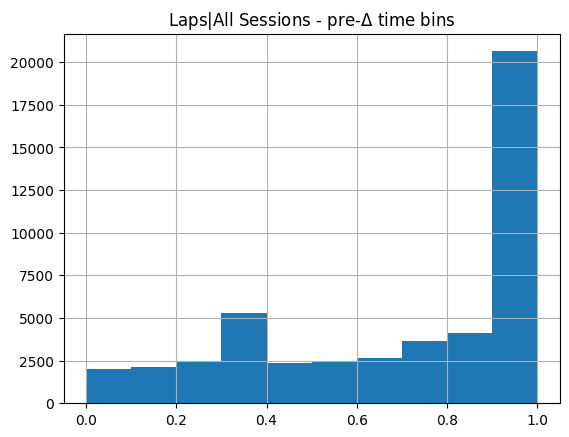

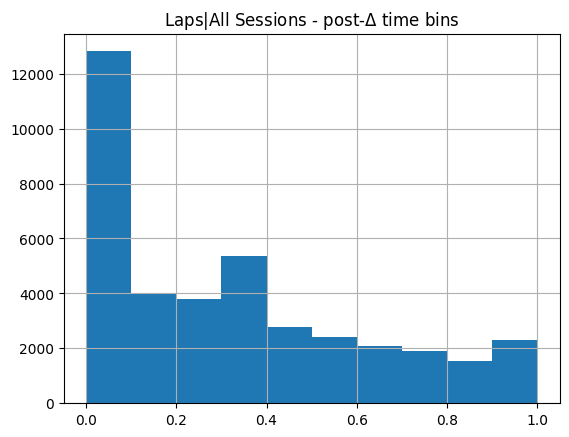

In [17]:
data_type = 'Laps'
session_spec = 'All Sessions'
data_results_df = all_sessions_laps_time_bin_df

# get the pre-delta epochs
pre_delta_df = data_results_df[data_results_df['delta_aligned_start_t'] <= 0]
post_delta_df = data_results_df[data_results_df['delta_aligned_start_t'] > 0]

descriptor_str: str = '|'.join([data_type, session_spec])
pre_delta_df.hist(column='P_Long')
plt.title(f'{descriptor_str} - pre-$\Delta$ time bins')
plt.show()

post_delta_df.hist(column='P_Long')
plt.title(f'{descriptor_str} - post-$\Delta$ time bins')
plt.show()

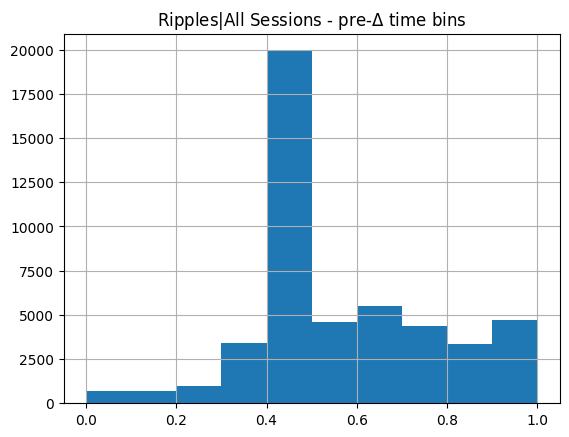

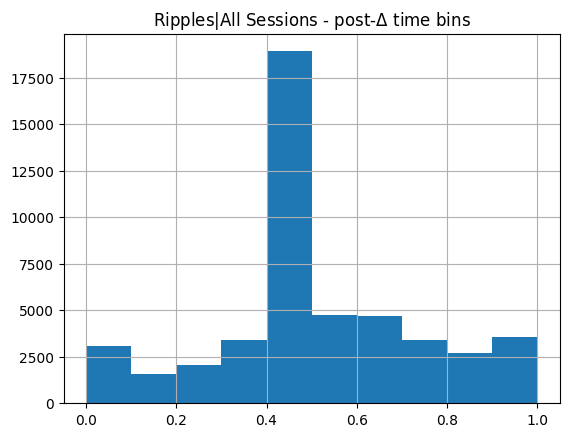

In [18]:
data_type = 'Ripples'
session_spec = 'All Sessions'
data_results_df = all_sessions_ripple_time_bin_df

# get the pre-delta epochs
pre_delta_df = data_results_df[data_results_df['delta_aligned_start_t'] <= 0]
post_delta_df = data_results_df[data_results_df['delta_aligned_start_t'] > 0]

descriptor_str: str = '|'.join([data_type, session_spec])
pre_delta_df.hist(column='P_Long')
plt.title(f'{descriptor_str} - pre-$\Delta$ time bins')
plt.show()

post_delta_df.hist(column='P_Long')
plt.title(f'{descriptor_str} - post-$\Delta$ time bins')
plt.show()

In [ ]:
all_sessions_laps_time_bin_df.hist(column='P_Long')
plt.show()

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import plot_all_epoch_bins_marginal_predictions
from attrs import define, field, Factory
from neuropy.utils.result_context import IdentifyingContext

@define(slots=False)
class TwoCSV:
	""" simple class wrapper to emulate the object that holds the other dfs """
	laps_all_epoch_bins_marginals_df = field()
	ripple_all_epoch_bins_marginals_df = field()

save_figure = True
def _perform_write_to_file_callback(final_context, fig):
	print(f'final_context: {final_context}')
	# if save_figure:
	# 	fig.save_fig(
	# 	# return owning_pipeline_reference.output_figure(final_context, fig)
	# else:
	# 	pass # do nothing, don't save
	
# all_sessions_laps_time_bin_df

collector = plot_all_epoch_bins_marginal_predictions(TwoCSV(laps_all_epoch_bins_marginals_df=all_sessions_laps_df, ripple_all_epoch_bins_marginals_df=all_sessions_ripple_df), t_start=None, t_split=0.0, t_end=None,
													active_context=IdentifyingContext(), perform_write_to_file_callback=_perform_write_to_file_callback)
collector



In [ ]:
result = tuple(collector.figures)


In [ ]:
result[0].show()

# HDF5 files

In [ ]:
from neuropy.utils.result_context import IdentifyingContext
from pyphoplacecellanalysis.SpecificResults.AcrossSessionResults import H5FileAggregator

h5_sessions = find_most_recent_files(found_session_export_paths=h5_files)
h5_sessions

final_sessions = {}
time_bin_size_sweep_results_files = {}

# final_sessions_loaded_laps_dict = {}
# final_sessions_loaded_ripple_dict = {}
# final_sessions_loaded_laps_time_bin_dict = {}
# final_sessions_loaded_ripple_time_bin_dict = {}

for session_str, session_dict in h5_sessions.items():
    final_sessions[session_str] = {}
    for file_type, (a_path, an_export_datetime) in session_dict.items():
        final_sessions[session_str][file_type] = a_path
        
    session_name: str = str(session_str)  # Extract session name from the filename
    if debug_print:
        print(f'processing session_name: {session_name}')
    curr_session_t_delta: Optional[float] = t_delta_dict.get(session_name, {}).get('t_delta', None)
    if curr_session_t_delta is None:
        print(f'WARN: curr_session_t_split is None for session_str = "{session_str}"')

    # finds each of the four exports:
    time_bin_size_sweep_results_file = final_sessions[session_str]['time_bin_size_sweep_results']
    time_bin_size_sweep_results_files[session_str] = Path(time_bin_size_sweep_results_file).resolve()
    # ripple_file = final_sessions[session_str]['ripple_marginals_df']
    # laps_time_bin_file = final_sessions[session_str]['laps_time_bin_marginals_df']
    # ripple_time_bin_file = final_sessions[session_str]['ripple_time_bin_marginals_df']
    


session_identifiers = [
    IdentifyingContext(format_name='kdiba',animal='gor01',exper_name='one',session_name='2006-6-08_14-26-15'), # prev completed
    IdentifyingContext(format_name='kdiba',animal='gor01',exper_name='one',session_name='2006-6-09_1-22-43'), # prev completed
    IdentifyingContext(format_name='kdiba',animal='gor01',exper_name='one',session_name='2006-6-12_15-55-31'), # prev completed
    IdentifyingContext(format_name='kdiba',animal='gor01',exper_name='two',session_name='2006-6-07_16-40-19'), # prev completed
    IdentifyingContext(format_name='kdiba',animal='gor01',exper_name='two',session_name='2006-6-08_21-16-25'),
    IdentifyingContext(format_name='kdiba',animal='gor01',exper_name='two',session_name='2006-6-09_22-24-40'),
    IdentifyingContext(format_name='kdiba',animal='gor01',exper_name='two',session_name='2006-6-12_16-53-46'),
    IdentifyingContext(format_name='kdiba',animal='vvp01',exper_name='one',session_name='2006-4-09_17-29-30'),
    IdentifyingContext(format_name='kdiba',animal='vvp01',exper_name='one',session_name='2006-4-10_12-25-50'),
    IdentifyingContext(format_name='kdiba',animal='vvp01',exper_name='two',session_name='2006-4-09_16-40-54'),
    IdentifyingContext(format_name='kdiba',animal='vvp01',exper_name='two',session_name='2006-4-10_12-58-3'),
    IdentifyingContext(format_name='kdiba',animal='pin01',exper_name='one',session_name='11-02_17-46-44'), # prev completed
    IdentifyingContext(format_name='kdiba',animal='pin01',exper_name='one',session_name='11-02_19-28-0'),
    IdentifyingContext(format_name='kdiba',animal='pin01',exper_name='one',session_name='11-03_12-3-25'),
    IdentifyingContext(format_name='kdiba',animal='pin01',exper_name='one',session_name='fet11-01_12-58-54'), # prev completed
]

# Keys are like: "/kdiba|gor01|two|2006-6-12_16-53-46"
included_h5_paths = list(time_bin_size_sweep_results_files.values())
session_group_keys: List[str] = [("/" + a_ctxt.get_description(separator="|", include_property_names=False)) for a_ctxt in session_identifiers] # 'kdiba/gor01/one/2006-6-08_14-26-15'
laps_decoding_accuracy_results_table_keys = [f"{session_group_key}/laps_decoding_accuracy_results/table" for session_group_key in session_group_keys]
a_loader = H5FileAggregator.init_from_file_lists(file_list=included_h5_paths, table_key_list=laps_decoding_accuracy_results_table_keys)
_out_table = a_loader.load_and_consolidate()
_out_table